### Custom BERT implementation

In [1]:
%cd ../..
from inpainting.models import BERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/image-inpainting


/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 54758


Device set to cuda


In [2]:
mnist = MNIST(frac=0.01, clusters=35, unimask=False)
weights = 1/mnist.distribution

In [3]:
model = BERT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens * 12, # Hidden size
    num_layers = 12,                # Number of Transformer layers
    num_heads = 12,                 # Numbertargets of attention heads
    ff_hidden = 3200,               # Feed-forward hidden size
    max_len = 7*7,                  # Maximum sequence length
    dropout = 0.01,
	ce_weights=weights
)

In [ ]:
Trainer(model, mnist).train(epochs=50, batch_size=64, lr=2e-4, warmup_steps=20)

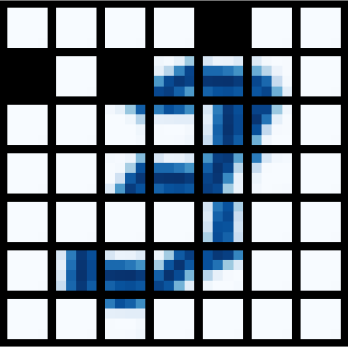

In [15]:
x = mnist[7]["input_ids"]
mnist.plot_sample(x)

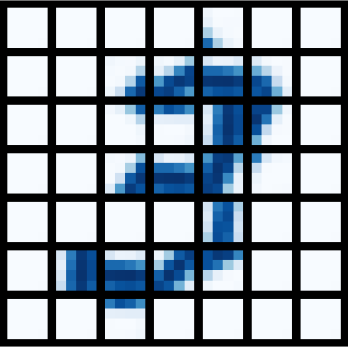

In [16]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)